In [2]:
import pandas as pd
from collections import defaultdict
from collections import Counter
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
import plotly.io as pio
pio.renderers.default = 'png'
import os
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



### Upload the dataset 

In [52]:
uci_test = pd.read_csv('./Data/UCI HAR Data Frame/uci_test.csv')
uci_train = pd.read_csv('./Data/UCI HAR Data Frame/uci_train.csv')
uci_df = pd.concat([uci_train,uci_test])
feature_cols = [c for c in uci_df.columns if c not in ('subject','activity')]

# Train-test split
X_train = uci_train[feature_cols]
y_train = uci_train['activity']
X_test = uci_test[feature_cols]
y_test = uci_test['activity']


In [82]:
uci_df

,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,STANDING,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,STANDING,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,STANDING,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,STANDING,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,STANDING,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,WALKING_UPSTAIRS,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,WALKING_UPSTAIRS,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,WALKING_UPSTAIRS,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,24,WALKING_UPSTAIRS,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


## Recover SVM result and apply more ML methods 

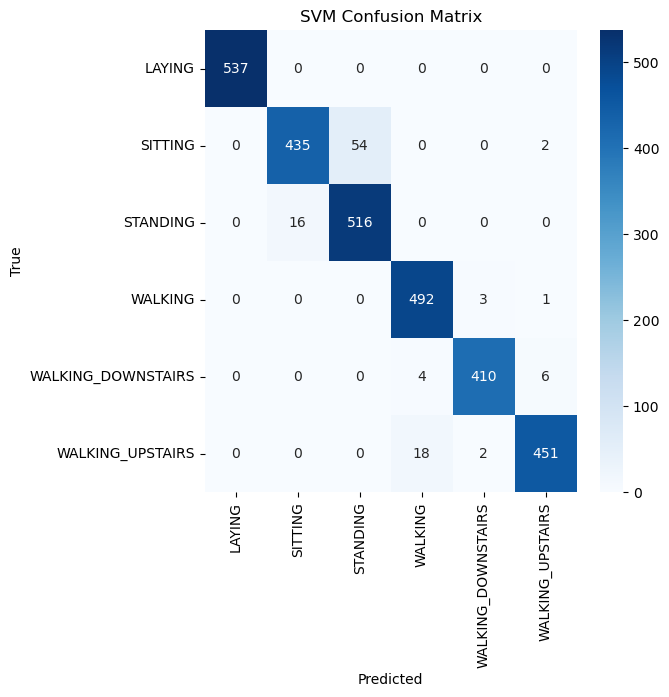

In [53]:
# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

#  Make predictions
y_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test,y_pred)

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [54]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)


In [76]:
## KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

In [77]:
#LOG-REG
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred_log)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



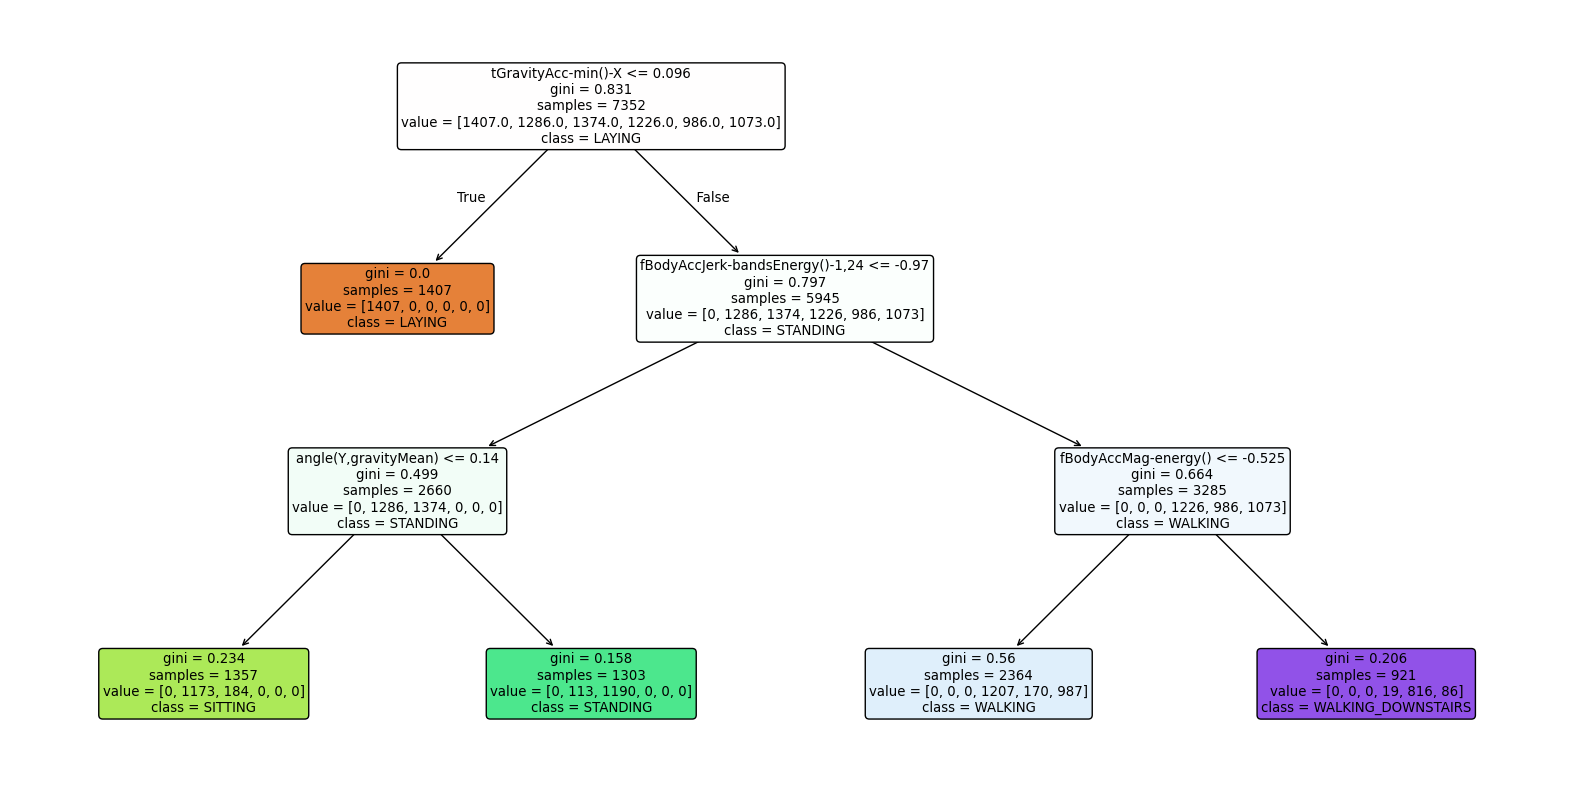

In [62]:
# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

# Plot Decision Tree for max_depth = 3
dt_model3 = DecisionTreeClassifier(max_depth = 3)
dt_model3.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
plt.figure(figsize=(20, 10))
plot_tree(dt_model3,
          filled=True,
          feature_names=X_train.columns,
          class_names=dt_model.classes_,
          rounded=True) 
plt.show()

In [81]:
# Print accuracy scores to compare different models

results = [{"Model": "SVM", "Accuracy": svm_acc},
           {"Model": "Logistic Regression", "Accuracy": logreg_acc},
           {"Model": "Random Forest", "Accuracy": rf_acc},
           {"Model": "KNN", "Accuracy": knn_acc},
           {"Model": "Decision Tree", "Accuracy": dt_acc}]

pd.DataFrame(results)


,Model,Accuracy
0,SVM,0.964031
1,Logistic Regression,0.960638
2,Random Forest,0.929080
3,KNN,0.900238
4,Decision Tree,0.861215


## Check the correlation between features

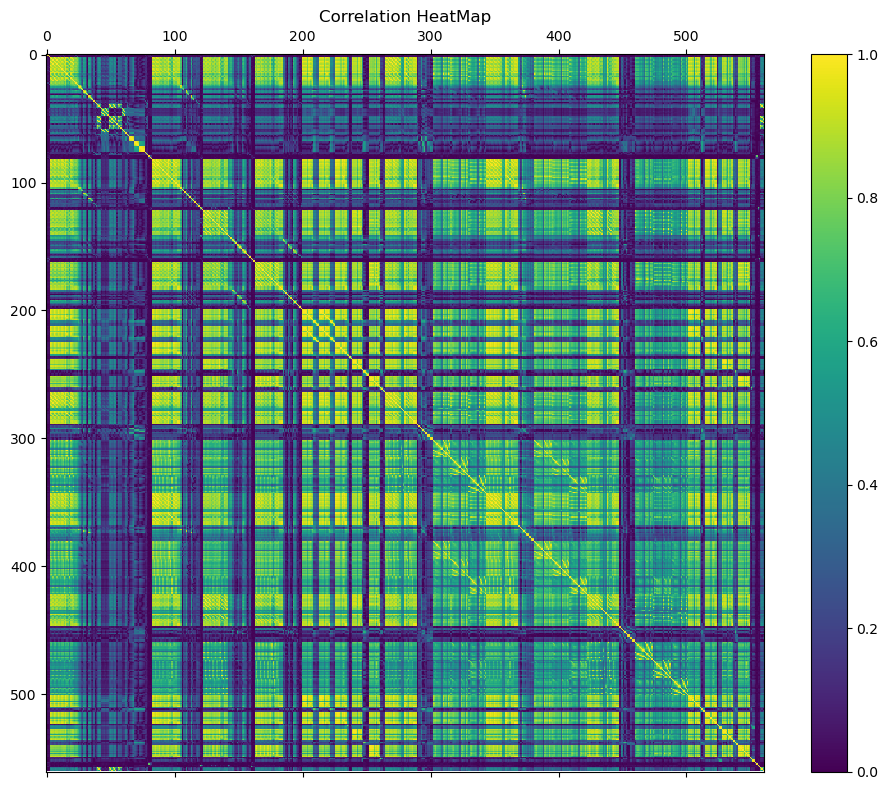

In [95]:
# Create correlation matrix
corr_matrix = uci_df[feature_cols].corr().abs()
fig, ax = plt.subplots(figsize = (10,8))
corr_heatmap = ax.matshow(corr_matrix, cmap = 'viridis', vmin = 0, vmax = 1)

fig.colorbar(corr_heatmap)
plt.title('Correlation HeatMap')
plt.tight_layout()
plt.show()